In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('../타이타닉/train.csv')
df_test = pd.read_csv('../타이타닉/test.csv')

Embarked(항구) 조사

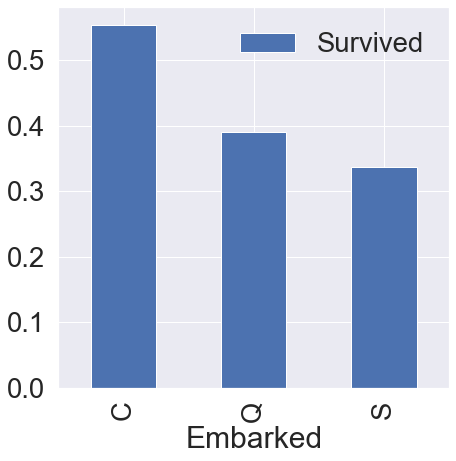

In [3]:
f , ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax)

In [6]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by='Survived', ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


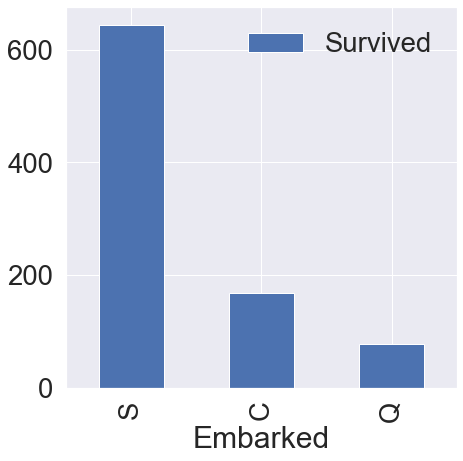

In [7]:
f , ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).count().sort_values(by='Survived', ascending = False).plot.bar(ax=ax)

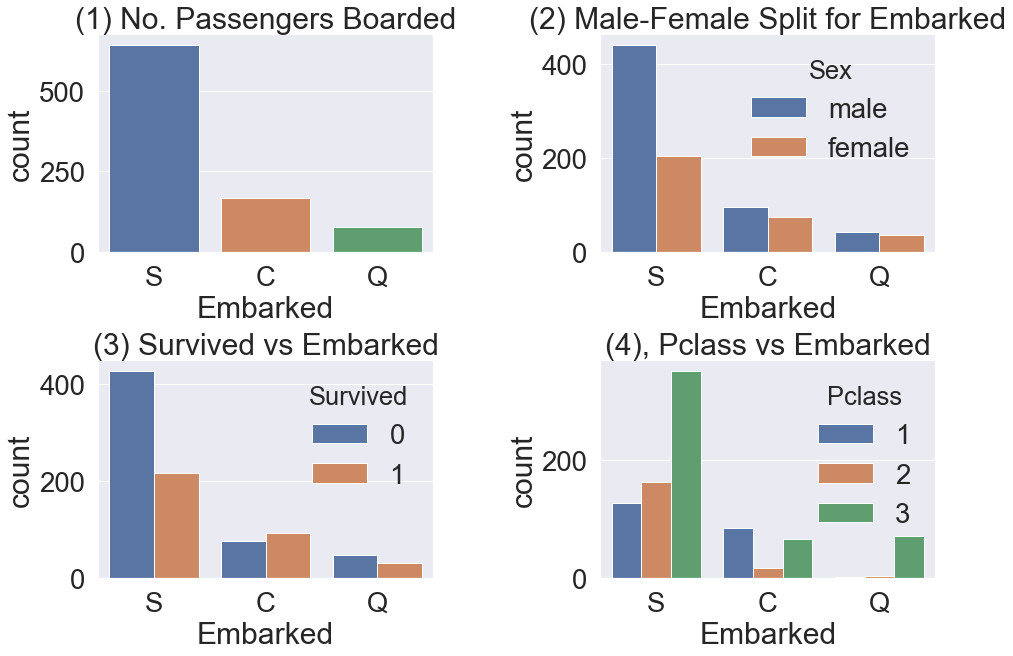

In [4]:
f, ax = plt.subplots(2, 2, figsize = (15, 10))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0,0].set_title('(1) No. Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex',data=df_train, ax = ax[0, 1] )
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data=df_train, ax = ax[1, 0])
ax[1,0].set_title('(3) Survived vs Embarked')

sns.countplot('Embarked', hue = 'Pclass', data=df_train, ax = ax[1, 1])
ax[1, 1].set_title('(4), Pclass vs Embarked')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [5]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
# 자신을 포함해야하니 1을 더한다. <- 나온 데이터는 그 '사람'의 가족이기 때문

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 
# 자신을 포함해야하니 1을 더한다.

In [6]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


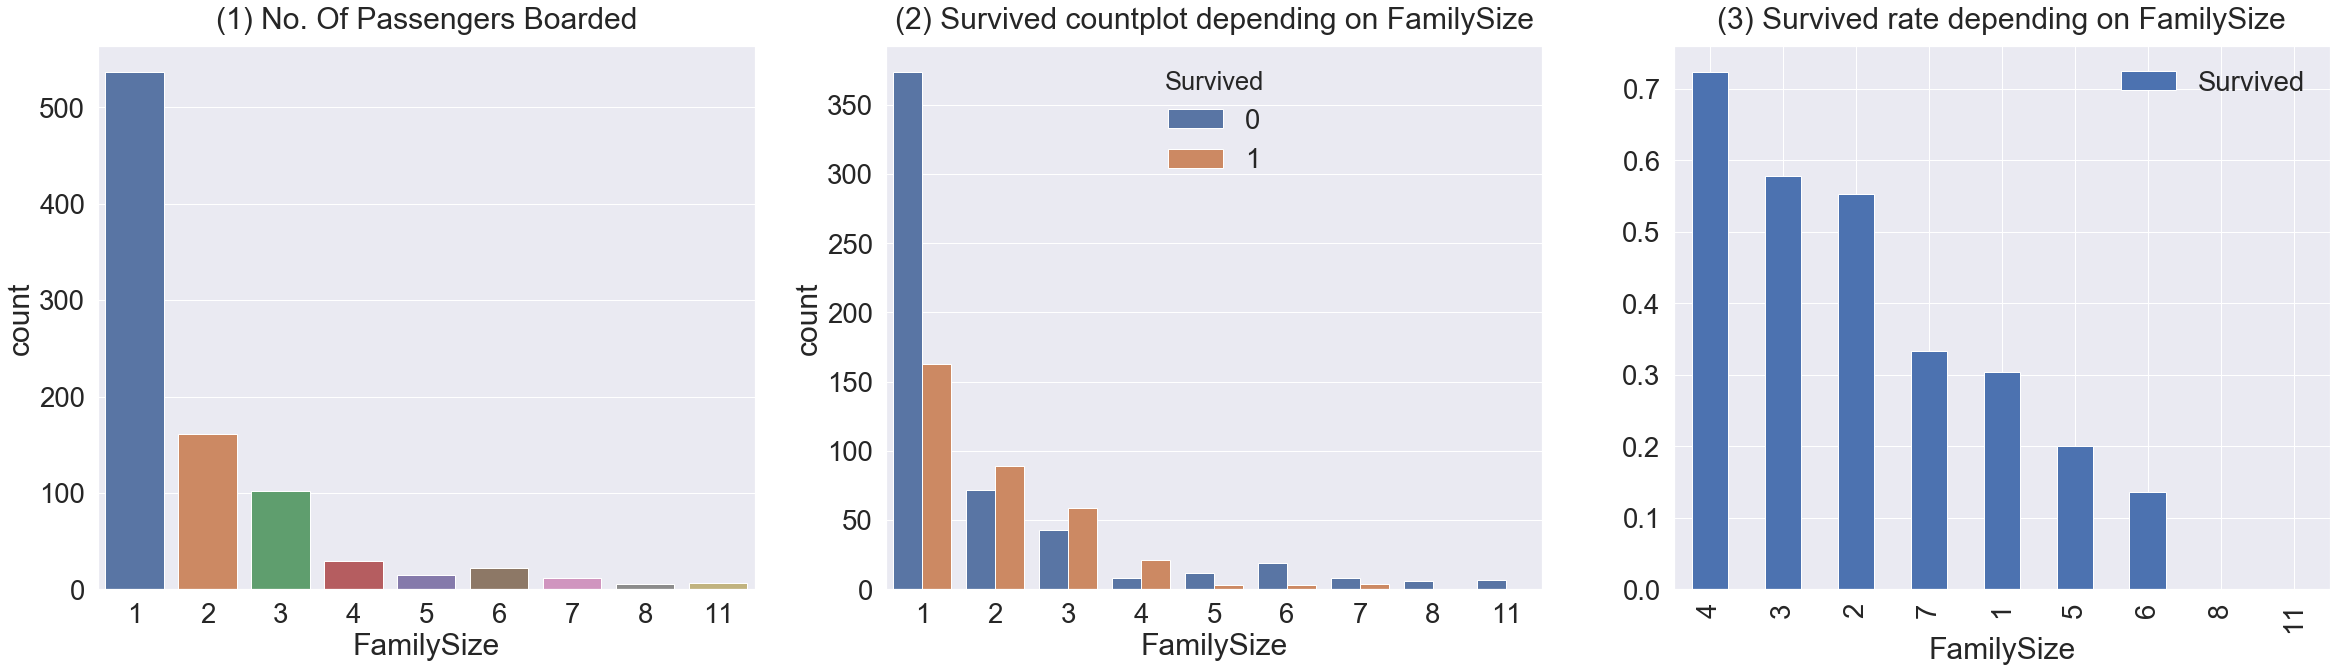

In [7]:
# FamilySize 와 생존의 관계를 살펴보기
fig, ax = plt.subplots(1, 3 , figsize = (40, 10))

sns.countplot('FamilySize', data = df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y = 1.02)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

Fare 요금

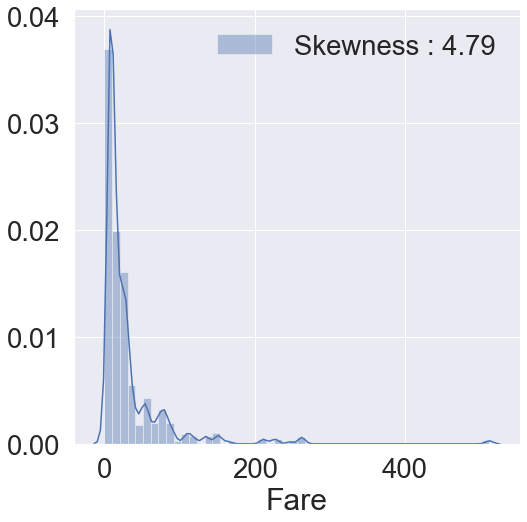

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc = 'best')
# Skewness 는 치우침 정도 수치. 왜도: 양옆 치우침, 첨도: 얼마나 뾰족한가.
# 왜도 양수 -> 분포가 왼쪽으로 치우침, 음수-> 오른쪽으로 치우침

In [9]:
df_test.loc[df_test.Fare.isnull(), 'Fare']=df_test['Fare'].mean()
# testset에 있는 nan value를 평균값으로 치환하기.
# loc 은 Pandas DataFrame 특정열전체를 선택하기 위한 메서드이다.
df_train['Fare'] = df_train['Fare'].map(lambda i:np.log(i) if i > 0 else 0)
#map은 lambda같은 간단하게 적용시킬 때, apply는 함수로 쓰일떄
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

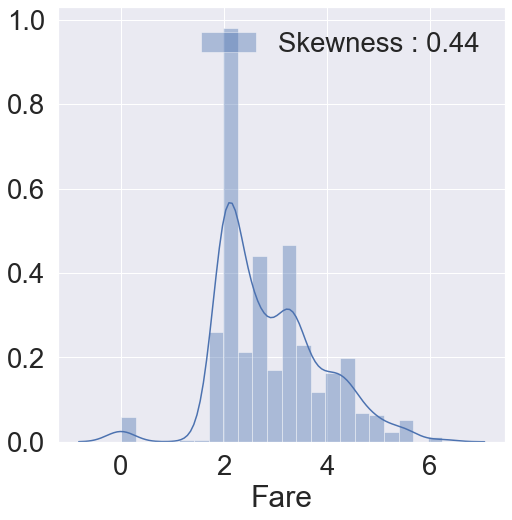

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc = 'best')

Cabin 은 NaN 이 80% 이상이기 때문에 이번 생존예측엔 고려하지 않는다.

In [11]:
# Ticket 변수로써 한번 아이디어를 작성하여 고려해보기.

df_train['Ticket'].value_counts()

CA. 2343      7
1601          7
347082        7
CA 2144       6
3101295       6
             ..
234360        1
111320        1
F.C. 12750    1
11769         1
A/5 21172     1
Name: Ticket, Length: 681, dtype: int64

## Feature engeenring

In [8]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [9]:
df_train = pd.read_csv('../타이타닉/train.csv')
df_test = pd.read_csv('../타이타닉/test.csv')
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

In [10]:
df_train['Age'].isnull().sum()

177

In [11]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')

##### 정규표현식
- 사전적인 의미로는 특정한 규칙을 가진 문자열의 집학을 표현하는데 사용한다.
- 문자열의 검색과 치환을 위한 용도로 쓰인다.

In [12]:
df_train['initial']=df_train['Name'].str.extract('([A-Za-z]+)\.') # str.extract() 에 정규식을 사용하여 매치되는 문자열을 추출할 수 있다.
df_test['initial']=df_test['Name'].str.extract('([A-Za-z]+)\.')

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [27]:
pd.crosstab(df_train['initial'], df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [28]:
df_train['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [29]:
df_train.groupby('initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


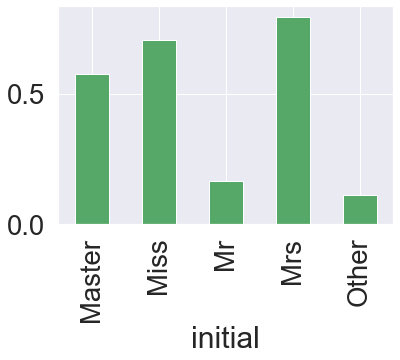

In [30]:
df_train.groupby('initial')['Survived'].mean().plot.bar(color = 'g')

In [15]:
df_train.loc[(df_train.Age.isnull())&(df_train.initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.initial=='Other'),'Age'] = 46

In [16]:
print('Embarked has', df_train['Embarked'].isnull().sum(), 'Null values')

Embarked has 2 Null values


In [17]:
df_train['Embarked'].fillna('S', inplace = True)

연속적인 Age 값을 categorical 하기

In [18]:
df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [34]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age']< 10 , 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age'])&(df_train['Age']<=20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age'])&(df_train['Age']<=30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age'])&(df_train['Age']<=40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age'])&(df_train['Age']<=50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age'])&(df_train['Age']<=60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age'])&(df_train['Age']<=70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

In [35]:
df_test['Age_cat'] = 0
df_test.loc[df_test['Age']< 10 , 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age'])&(df_test['Age']<=20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age'])&(df_test['Age']<=30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age'])&(df_test['Age']<=40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age'])&(df_test['Age']<=50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age'])&(df_test['Age']<=60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age'])&(df_test['Age']<=70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [36]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_cat2'] = df_train['Age'].apply(category_age)

In [37]:
print('1번 방법, 2번 방법 둘달 같은 결과를 내면 True줘야함 ->', (df_train['Age_cat'] == df_train['Age_cat2']).all())

1번 방법, 2번 방법 둘달 같은 결과를 내면 True줘야함 -> True


In [38]:
df_train['Age_cat2']

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: Age_cat2, Length: 891, dtype: int64

In [39]:
# 중복되는 Age_cat 컬럼 제거
df_train.drop(['Age', 'Age_cat2'], axis = 1, inplace = True)
df_test.drop(['Age'], axis = 1, inplace = True)

initial, Embarked, Sex 를 컴퓨터가 인식할 수 있게 수치화 시켜야 한다.

map method 를 가지고 간단히 구현한다.

In [40]:
df_train['initial'] = df_train['initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['initial'] = df_test['initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [41]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [42]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [44]:
# Null이 사라졌는지 확인작업 필요
# any() 를 사용하여, True 가 단 하나라도 있을 시(Null이 한개라도 있을 시) True 를 반환하게 된다.
df_train['Embarked'].isnull().any()
# False 가 출력되면 null값이 없는 것.

False

In [45]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [46]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [47]:
df_train['Sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64>

상관관계 구하기.
두 변수간의 Pearson correlation 을 구하면 (-1, 1) 사이의 값을 얻을 수 있습니다. -1로 갈수록 음의 상관관계, 1로 갈수록 양의 상관관계를 의미하며, 0은 상관관계가 없다는 것을 의미합니다.


우리는 여러 feature 를 가지고 있으니 이를 하나의 maxtrix 형태로 보면 편할 텐데, 이를 heatmap plot 이라고 하며, dataframe 의 corr() 메소드와 seaborn 을 가지고 편하게 그릴 수 있습니다.

In [48]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'initial',
       'Age_cat'],
      dtype='object')

In [49]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'initial', 'Age_cat']]
heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.280537
initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.481309,1.000000


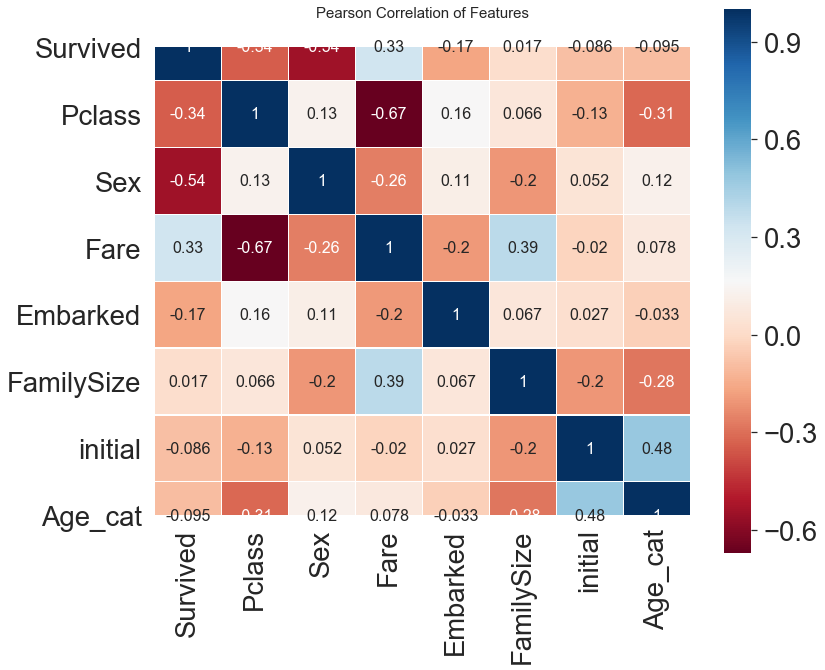

In [50]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12, 10))
plt.title('Pearson Correlation of Features',y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr()
           ,linewidths=0.1, vmax=1.0, square=True, cmap=colormap,
           linecolor = 'white', annot = True,
           annot_kws = {"size": 16})

del heatmap_data
# vmax = 간격, annot = 표시여부

Data preprocessing (전처리)

one-hot encoding => "A이냐, A가 아니냐??" 이것만 판단!

In [51]:
# 모델의 성능을 높이기 위해 one-hot encoding 해주기
# 수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 로 매핑해주는 것
# One-hot encoding 은 위 카테고리를 아래와 같이 (0, 1) 로 이루어진 5차원의 벡터로 나타내는 것을 말합니다.
# get_dummies 사용하여 쉽게 해결

pd.get_dummies(df_train, columns=[])

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,2.564949,NaN,2,1,4,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,3.401197,B42,2,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,3.154870,NaN,2,4,1,2
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,3.401197,C148,0,1,2,2


In [52]:
df_train = pd.get_dummies(df_train, columns=['initial'], prefix='initial') # prefix : initial 이름으로 인코딩 하겠다.
df_test = pd.get_dummies(df_test, columns=['initial'], prefix='initial')

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [54]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = ['Embarked'])
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = ['Embarked'])

In [55]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [56]:
# 필요없는 featrue 없애기
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [57]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


# Machine Learning

In [58]:
from sklearn.ensemble import RandomForestClassifier
# 유명한 모델인 randomforestclassfier 이다.
from sklearn import metrics
# 모델의 평가를 위해서 쓴다.
from sklearn.model_selection import train_test_split
# training set을 쉽게 나눠주는 함수.

In [59]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [60]:
# validation을 통해 test전에 사전 체크해보기!
X_tr, X_vld, Y_tr, Y_vld = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2018)

In [61]:
model = RandomForestClassifier()
model.fit(X_tr, Y_tr)
prediction = model.predict(X_vld)

In [62]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(Y_vld.shape[0], 100*metrics.accuracy_score(prediction, Y_vld)))

총 268명 중 82.46% 정확도로 생존을 맞춤


##### feature_importance

In [63]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

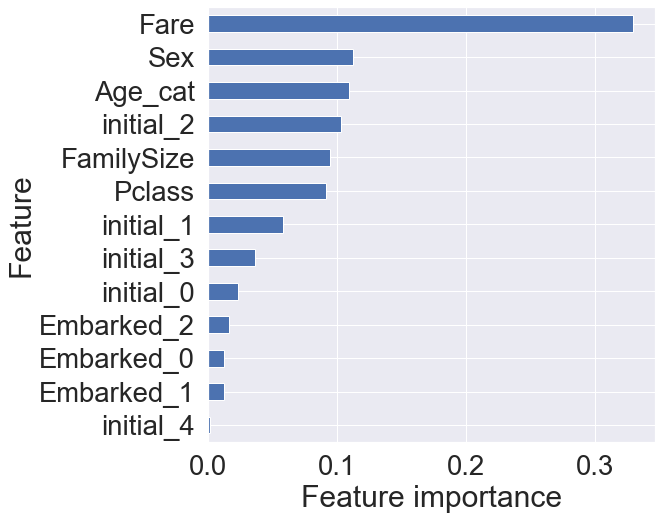

In [64]:
plt.figure(figsize = (8, 8))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

gender_submission.csv은 따로 받지 않았음.

In [65]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

FileNotFoundError: [Errno 2] File b'../input/titanic/gender_submission.csv' does not exist: b'../input/titanic/gender_submission.csv'

In [66]:
submission.head()

NameError: name 'submission' is not defined

In [125]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [126]:
submission.to_csv("./my_first_submission.csv", index = False)